# **House Price Prediction & Analysis**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## about Dataset

`Date`: The date when the property was sold. This feature helps in understanding the temporal trends in property prices.

`Price`:The sale price of the property in USD. This is the target variable we aim to predict.

`Bedrooms`:The number of bedrooms in the property. Generally, properties with more bedrooms tend to have higher prices.

`Bathrooms`: The number of bathrooms in the property. Similar to bedrooms, more bathrooms can increase a property’s value.

`Sqft Living`: The size of the living area in square feet. Larger living areas are typically associated with higher property values.

`Sqft Lot`:The size of the lot in square feet. Larger lots may increase a property’s desirability and value.

`Floors`: The number of floors in the property. Properties with multiple floors may offer more living space and appeal.

`Waterfront`: A binary indicator (1 if the property has a waterfront view, 0 other-wise). Properties with waterfront views are often valued higher.

`View`: An index from 0 to 4 indicating the quality of the property’s view. Better views are likely to enhance a property’s value.

`Condition`: An index from 1 to 5 rating the condition of the property. Properties in better condition are typically worth more.

`Sqft Above`: The square footage of the property above the basement. This can help isolate the value contribution of above-ground space.

`Sqft Basement`: The square footage of the basement. Basements may add value depending on their usability.

`Yr Built`: The year the property was built. Older properties may have historical value, while newer ones may offer modern amenities.

`Yr Renovated`: The year the property was last renovated. Recent renovations can increase a property’s appeal and value.

`Street`: The street address of the property. This feature can be used to analyze location-specific price trends.

`City`: The city where the property is located. Different cities have distinct market dynamics.

`Statezip`: The state and zip code of the property. This feature provides regional context for the property.

`Country`: The country where the property is located. While this dataset focuses on properties in Australia, this feature is included for completeness.

In [4]:
house = pd.read_csv('USA-Housing-Dataset.csv')
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [5]:
house.shape

(4140, 18)

# **Data Preprocessing**

## **Hanling Invalid Data**

In [6]:
house[house.select_dtypes(include='number') < 0] = pd.NA

## **Handling Missing Values**

In [7]:
house.isna().any().sum()

0

*No missing values*

## **Handling Outiers**

In [8]:
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,0.007488,0.246618,3.452415,1831.351449,312.287440,1970.814010,808.368357
std,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.086219,0.790619,0.678533,861.382947,464.349222,29.807941,979.380535
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000
75%,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000
max,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,4820.000000,2014.000000,2014.000000


<Axes: >

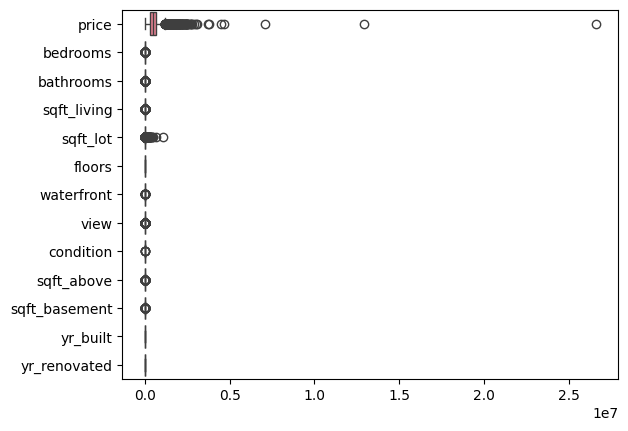

In [9]:
sns.boxplot(data=house, orient='h')

<Axes: >

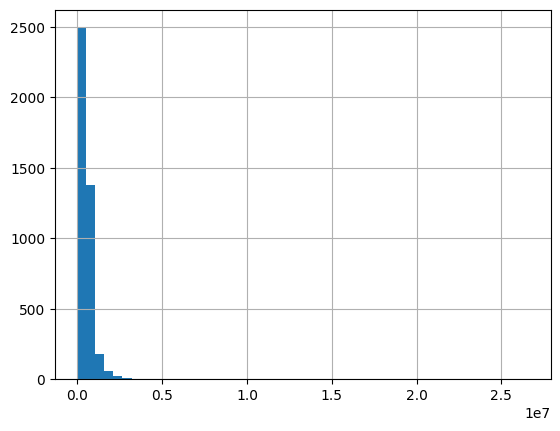

In [10]:
house['price'].hist(bins=50)

In [11]:
house_75 = house.select_dtypes(include='number').quantile(0.75)
house_25 = house.select_dtypes(include='number').quantile(0.25)
house_iqr = house_75 - house_25
house_iqr

price            339125.00
bedrooms              1.00
bathrooms             0.75
sqft_living        1150.00
sqft_lot           6000.00
floors                1.00
waterfront            0.00
view                  0.00
condition             1.00
sqft_above         1120.00
sqft_basement       602.50
yr_built             46.00
yr_renovated       1999.00
dtype: float64

In [12]:
upper = house_75 + 1.5 * house_iqr
lower = house_25 - 1.5 * house_iqr

In [13]:
for col in upper.index:
    house = house[(house[col] <= upper[col]) & (house[col] >= lower[col])]

<Axes: >

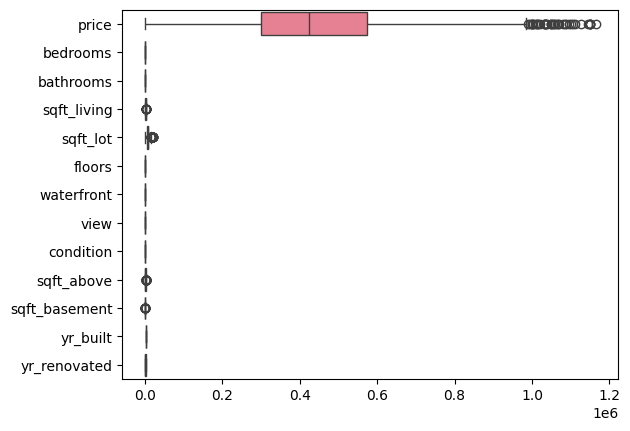

In [14]:
sns.boxplot(data=house, orient='h')

<Axes: >

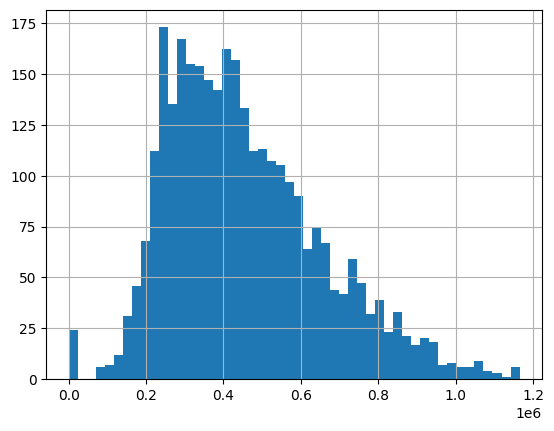

In [15]:
house['price'].hist(bins=50)

*The data is more normally distributed now*

## **Fixing Datatypes**

In [16]:
house.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

*We want to change the "date" datatype to Datetime*

In [17]:
house['date'] = pd.to_datetime(house['date'])

In [18]:
house.dtypes

date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
street                   object
city                     object
statezip                 object
country                  object
dtype: object

# **Data Manipulation & Analysis**

### *Does the date that the property was sold in, affect the price of the property?*

We don't need to analyze everything about date and will focus on year and month only, so we will add new year_sold and month_sold columns to the dataset.

In [19]:
house['year_sold'] = house['date'].dt.year
house['month_sold'] = house['date'].dt.month

In [20]:
house.head(1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,year_sold,month_sold
0,2014-05-09,376000.0,3.0,2.0,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA,2014,5


<Axes: >

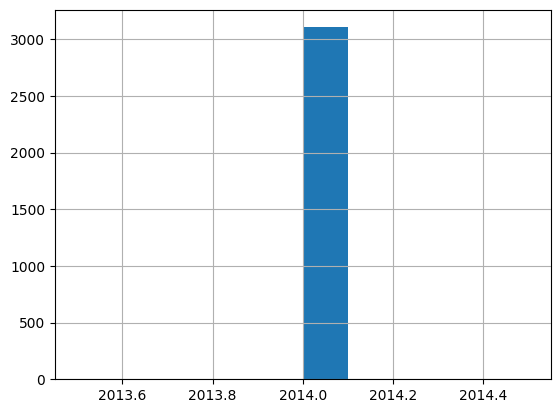

In [21]:
house['year_sold'].hist(bins=10)

*Seems like the data only has 2014 prices, so 'year_sold' is not going to be useful.*

In [22]:
house = house.drop(columns=['year_sold'])

<Axes: >

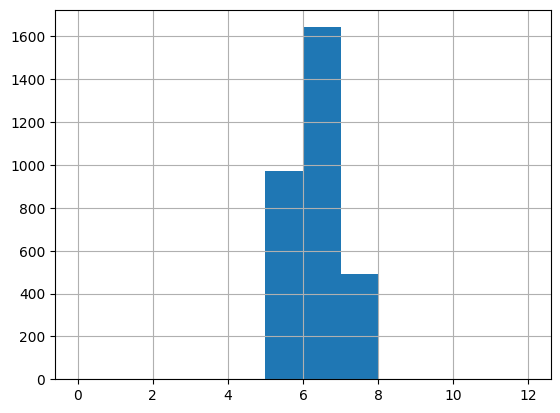

In [23]:
house['month_sold'].hist(bins=np.arange(0, 13, 1))

<Axes: xlabel='month_sold', ylabel='price'>

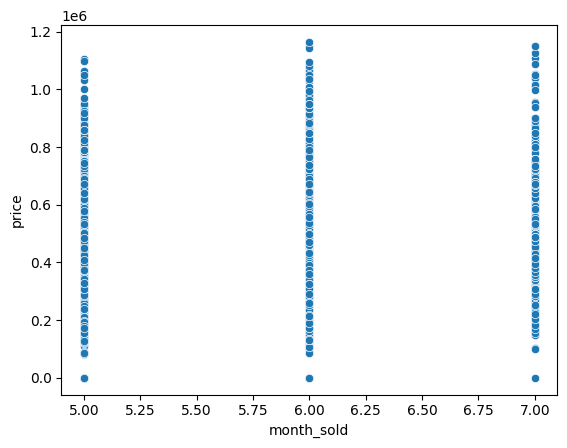

In [24]:
sns.scatterplot(data=house, x='month_sold', y='price')

<Axes: xlabel='month_sold', ylabel='count'>

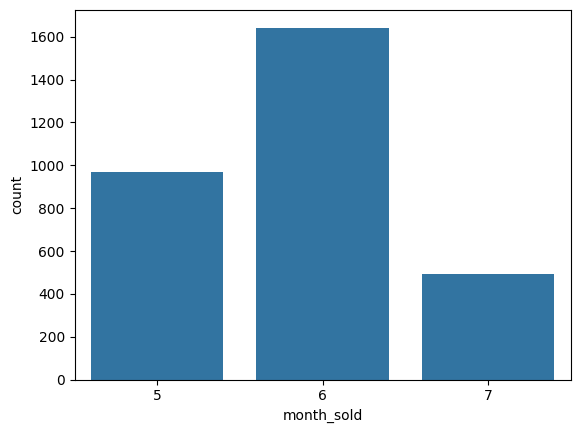

In [25]:
sns.countplot(data=house, x='month_sold')

*We can see that the properties are sold only in May, June, and July and mostly in June.*

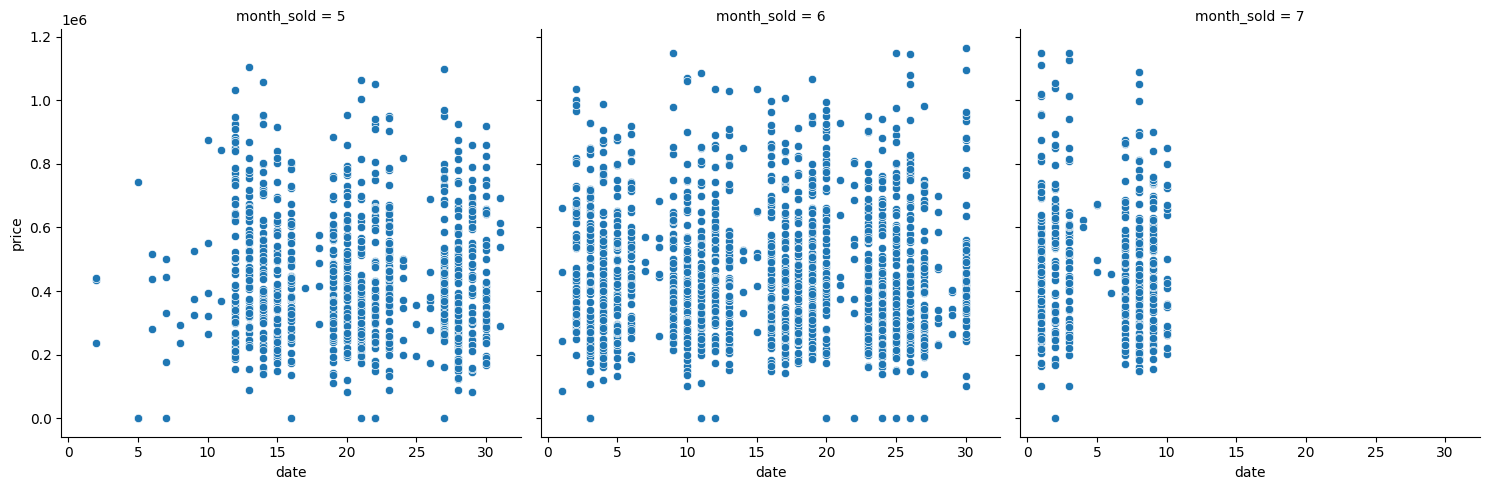

In [26]:
sns.relplot(kind='scatter',
            data=house,
            x=house['date'].dt.day,
            y='price',
            col='month_sold')

<Axes: xlabel='month_sold', ylabel='price'>

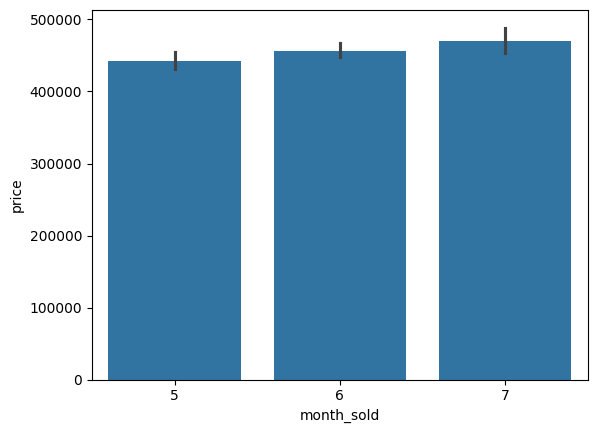

In [27]:
sns.barplot(data=house, x='month_sold', y='price')

*The prices do not differ significantly based on the month sold. We are going to test this exactly later in hypothesis tesing.*

### *Does the city where the property is in, affect the price?*

In [28]:
house.groupby('city')['price'].agg(['min', 'max', 'mean']).sort_values('mean', ascending=False)

,min,max,mean
city,,,
Clyde Hill,927000.000000,945000.0,936000.000000
Mercer Island,0.000000,1087500.0,794878.703704
Beaux Arts Village,745000.000000,745000.0,745000.000000
Bellevue,0.000000,1150000.0,645149.360101
Sammamish,237333.333333,1150000.0,642732.355702
Redmond,216000.000000,1033888.0,614358.628118
Newcastle,339900.000000,1068000.0,592616.600000
Issaquah,240000.000000,950000.0,556154.527544
Kirkland,90000.000000,1150000.0,553345.303633


<Axes: xlabel='city', ylabel='price'>

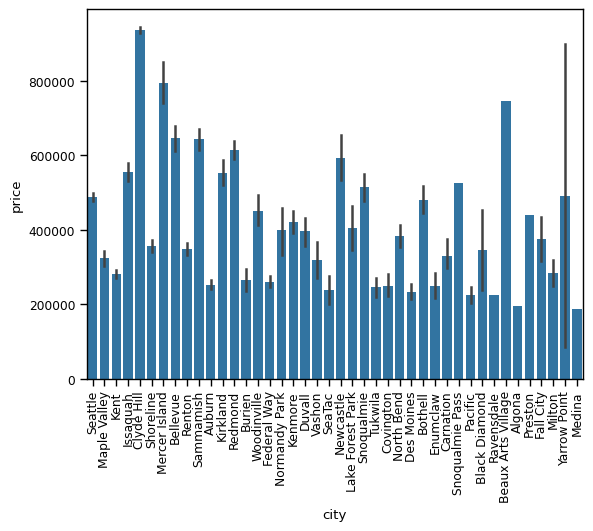

In [46]:
plt.xticks(rotation=90)
sns.barplot(data=house, x='city', y='price')

<Axes: xlabel='city', ylabel='count'>

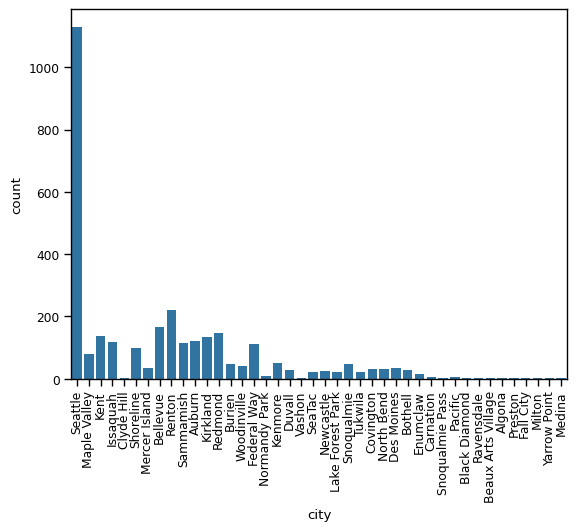

In [47]:
plt.xticks(rotation=90)
sns.countplot(data=house, x='city')

*It appears that house prices in Clyde Hill are generally higher, while a greater number of houses are being sold in Seattle.*

### *Where are the 10 most expensive streets?*

In [31]:
most_exp_streets = pd.DataFrame(house.groupby(['street', 'city'])['price'].mean()[0:10].sort_values(ascending=False))
most_exp_streets

,,price
street,city,
10 W Etruria St,Seattle,625000.0
100 20th Ave E,Seattle,600000.0
100 Mt Si Pl NW,Issaquah,575000.0
1000 Mountain View Blvd SE,North Bend,397000.0
1 View Ln NE,Duvall,309620.0
1001 Whitman Ct NE,Renton,302000.0
10009 SE 247th Pl,Kent,289950.0
10000-10026 S 100th St,Seattle,284000.0
10005 16th Ave S,Seattle,265000.0


<Axes: xlabel='street', ylabel='price'>

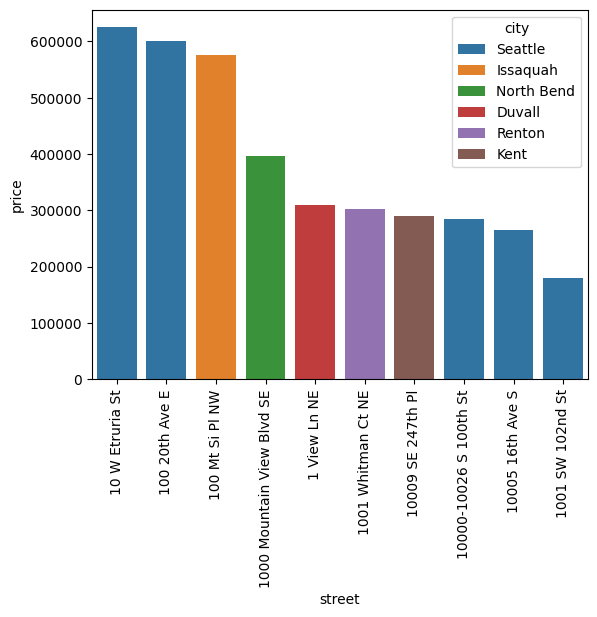

In [32]:
plt.xticks(rotation=90)
sns.barplot(data=most_exp_streets, x='street', y='price', hue='city')

*The most expensive houses are located at 10 W Etruria St, Seattle. Interestingly, despite Clyde Hill having the highest average housing prices, it does not appear in the list of the ten most expensive houses. Let's take a closer look at how housing prices are distributed in each city.*

In [33]:
def count_outliers(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    n = ((col < lower) | (col > upper)).sum()
    return n

In [34]:
std_out = house.groupby('city')['price'].agg(['std', count_outliers])

In [35]:
sns.set_context('paper')

<Axes: xlabel='city', ylabel='count_outliers'>

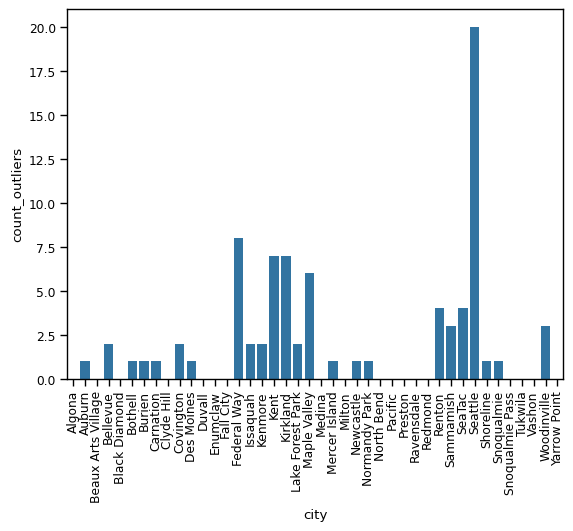

In [48]:
plt.xticks(rotation=90)
sns.barplot(data=std_out, x='city', y='count_outliers')

<Axes: xlabel='city', ylabel='std'>

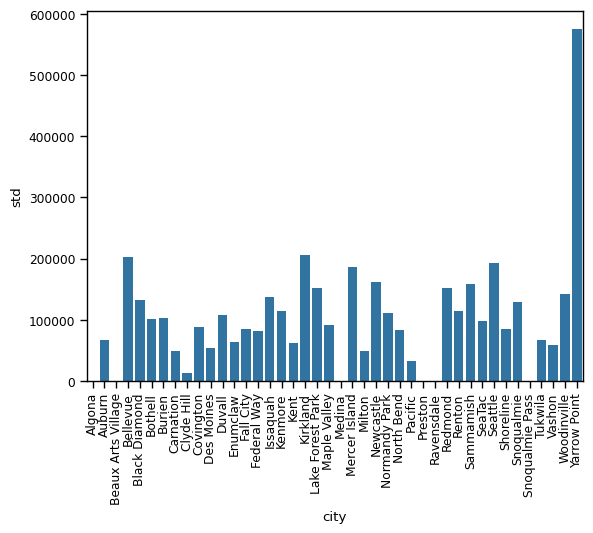

In [37]:
plt.xticks(rotation=90)
sns.barplot(data=std_out, x='city', y='std')

*We can now understand why Seattle has the most expensive houses, while Clyde Hill does not. Seattle exhibits the highest number of outliers, which is often the case when the dataset is large. As previously noted, Seattle contains a significantly larger dataset compared to Clyde Hill, which has very few entries.*

<Axes: >

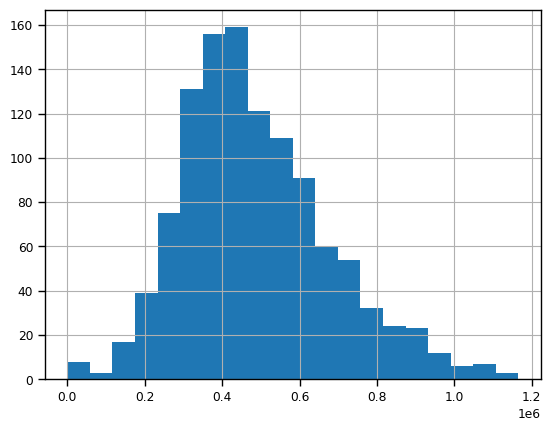

In [38]:
house[house['city'] == 'Seattle']['price'].hist(bins=20)

*We see that house pricing in Seattle is close to a normal distribution.*

### *How does the size of the hosue affect the price?*

In [44]:
house['price'].corr(house['sqft_living'])

0.5657304360358545

<Axes: xlabel='sqft_living', ylabel='price'>

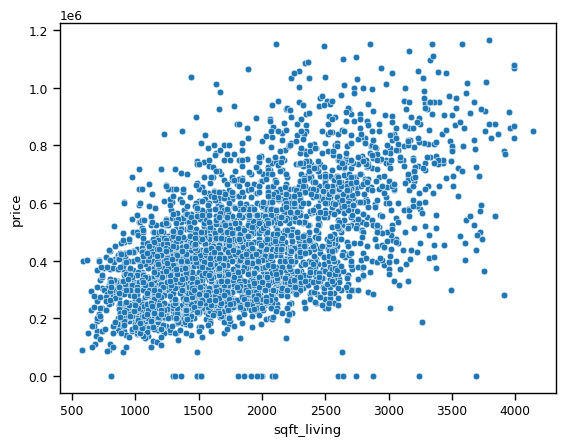

In [49]:
sns.scatterplot(data=house, x='sqft_living', y='price')

<Axes: xlabel='sqft_living', ylabel='price'>

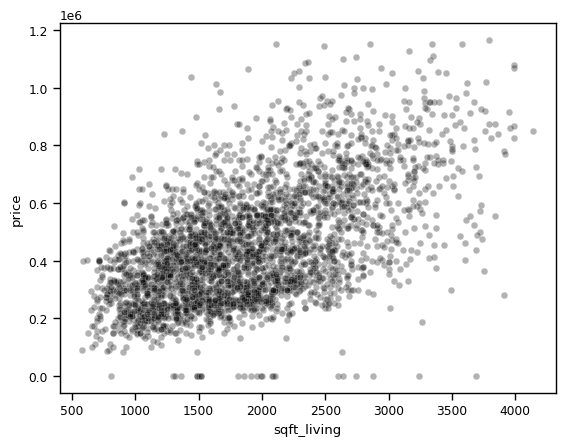

In [87]:
sns.set_palette(['#000000'])
sns.scatterplot(data=house, x='sqft_living', y='price', alpha=0.3)

<Axes: xlabel='sqft_living', ylabel='price'>

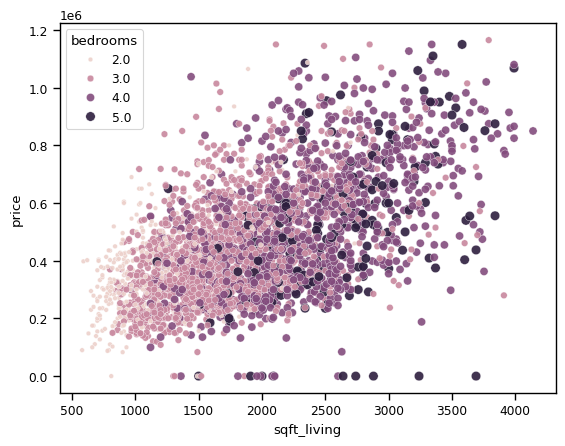

In [94]:
sns.scatterplot(data=house, x='sqft_living', y='price', size='bedrooms', hue='bedrooms', alpha=0.9)

<Axes: xlabel='sqft_lot', ylabel='price'>

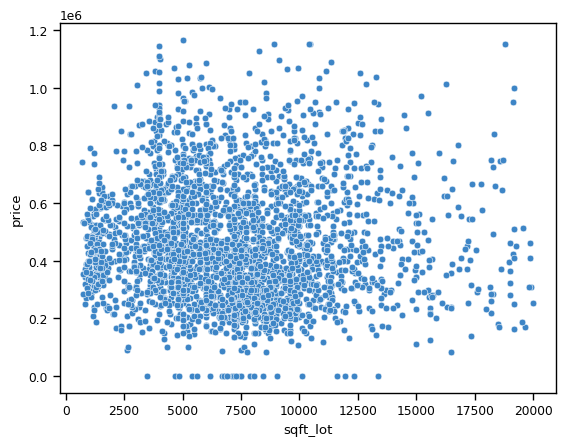

In [101]:
sns.scatterplot(data=house, x='sqft_lot', y='price')

In [95]:
house['sqft'] = house['sqft_living'] + house['sqft_lot']

<Axes: xlabel='sqft', ylabel='price'>

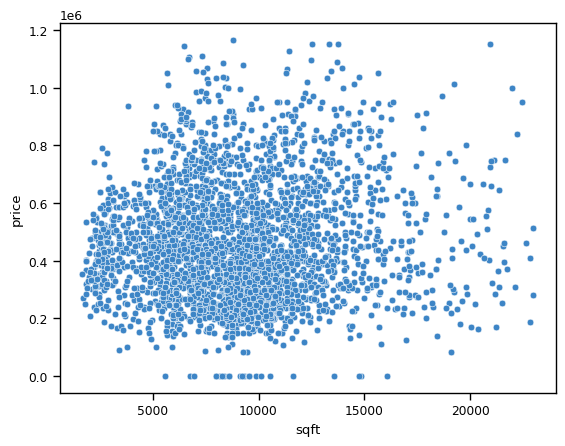

In [100]:
sns.set_palette(['#3d85c6'])
sns.scatterplot(data=house, x='sqft', y='price')

In [106]:
house['price'].corr(house['sqft_lot'])

-0.029898715808773586

In [105]:
house['price'].corr(house['sqft'])

0.0721227433632114

*We can see a positive relationship between the price and size of the living area and number of bedrooms. But there seems to be no  relationship between the whole property size and the price. So the living area size affects the price more.*

### *How does the year the house was built in affect the price?*

<Axes: xlabel='yr_built', ylabel='price'>

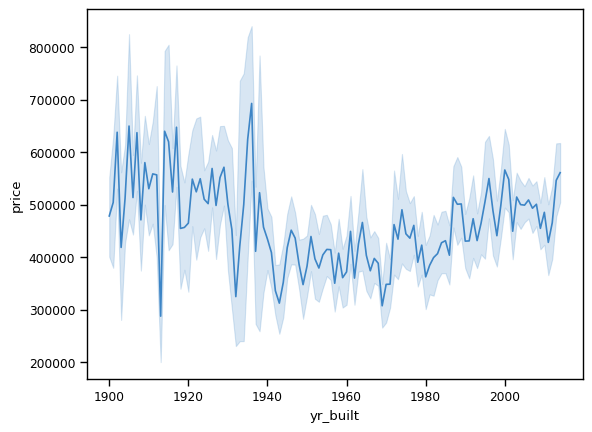

In [114]:
sns.lineplot(data=house, x='yr_built', y='price')

<Axes: xlabel='yr_renovated', ylabel='price'>

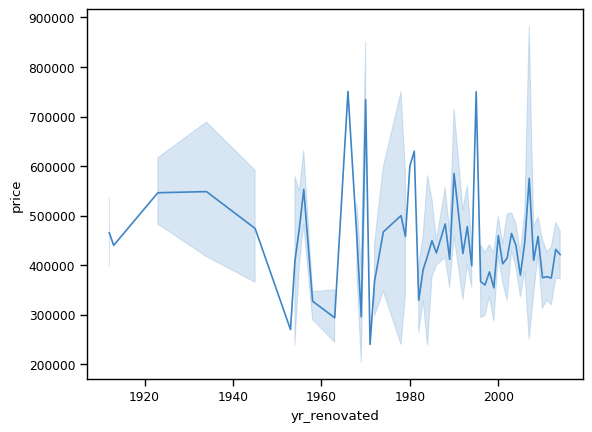

In [119]:
sns.lineplot(data=house[house['yr_renovated'] != 0], x='yr_renovated', y='price')

In [120]:
house['yr_tot'] = np.where(house['yr_renovated'] > house['yr_built'],
                           house['yr_renovated'],
                           house['yr_built'])

In [121]:
house.head(1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,month_sold,sqft,yr_tot
0,2014-05-09,376000.0,3.0,2.0,1340,1384,3.0,0,0,3,...,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA,5,2724,2008


<Axes: xlabel='yr_tot', ylabel='price'>

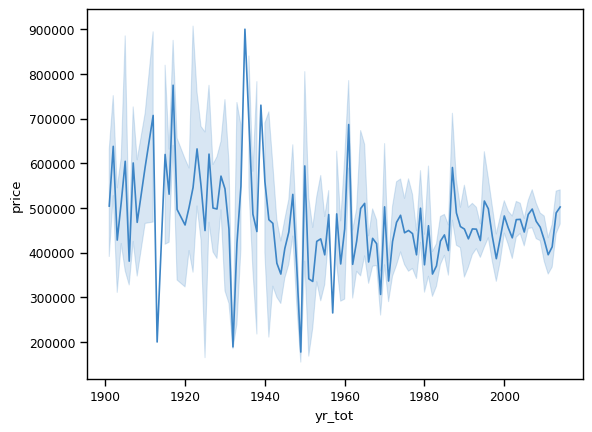

In [122]:
sns.lineplot(data=house, x='yr_tot', y='price')

In [115]:
house['price'].corr(house['yr_built'])

0.032555752382550575

In [126]:
house['price'].corr(house['yr_tot'])

-0.022993921437913498

<Axes: xlabel='yr_tot', ylabel='price'>

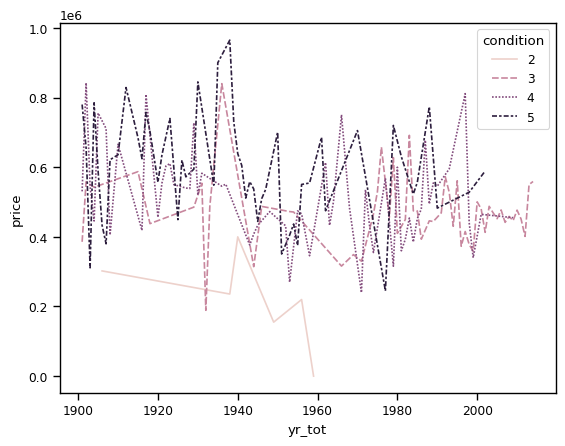

In [130]:
sns.lineplot(data=house[house['city'] == 'Seattle'], x='yr_tot', y='price', style='condition', hue='condition', errorbar=None)